# Modeling And Machine Learning.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_pickle("../data/train_data_wrangle.plk")
test = pd.read_pickle("../data/test_data_wrangle.plk")

RANDOM_STATE = 42

In [3]:
print(train['class'].unique(), ' ', test['class'].unique())

[3 2 1]   [2 3 1]


## Applying machine learning techniques.

In [4]:
X_train = train.drop('class',axis=1)
y_train = train['class']

X_test = test.drop('class',axis=1)
y_test = test['class']

In [5]:
!pip install yellowbrick
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\rahul\anaconda3\lib\site-packages (0.3.3)
Requirement not upgraded as not directly required: numpy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (1.13.3)
Requirement not upgraded as not directly required: scipy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: scikit-learn in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

def classifier_scores(clf, phase, x, y, to_print=False, class_print=False, func=accuracy_score):
    """A function used for fitting the classifier, predicting and printing accuracy scores."""
    if phase == 'train':
        clf.fit(x, y)
    if to_print:
        print('Accuracy score of classifier on','train' if phase=='train' else phase,'is',func(clf.predict(x), y))
    
    return clf

def show_report(clf, X, y, type_of='confusion', phase='test'):
    """Function to plot classification report, can also plot confusion matrix."""
    if type_of == 'classification':
        print('Training' if phase=='train' else 'Test','classification report.')
        report_type = ClassificationReport(clf, cmap='Blues')
    else:        
        print('Training' if phase=='train' else 'Test','confusion matrix.')
        report_type = ConfusionMatrix(clf, cmap='Blues')
    if phase == 'train':
        report_type.fit(X, y)
    report_type.score(X, y)
    report_type.poof()

## LogisticRegression will be selected as a base model.

In [7]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

_ = classifier_scores(logreg, 'train', X_train, y_train, True)
_ = classifier_scores(logreg, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.926033934252
Accuracy score of classifier on test is 0.928529754959
Wall time: 53.8 ms


### Tuning parameters for logistic regression

In [8]:
classifiers = {} # classifiers
# the grid of parameters to search over
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':Cs}
logreg = LogisticRegression()

gridSearchClf = GridSearchCV(logreg, parameters)
classifier_scores(gridSearchClf, 'train', X_train, y_train)

c = gridSearchClf.best_params_['C']
print('C value:',c)
logreg_C = LogisticRegression(C = c)

_ = classifier_scores(logreg_C, 'train', X_train, y_train, True)
_ = classifier_scores(logreg_C, 'test', X_test, y_test, True)

C value: 1000
Accuracy score of classifier on train is 0.952279957582
Accuracy score of classifier on test is 0.946616102684


Training classification report.


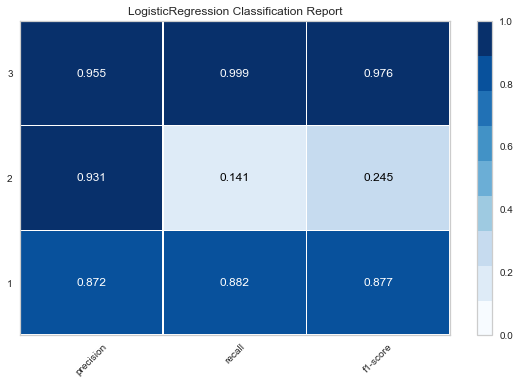

Test classification report.


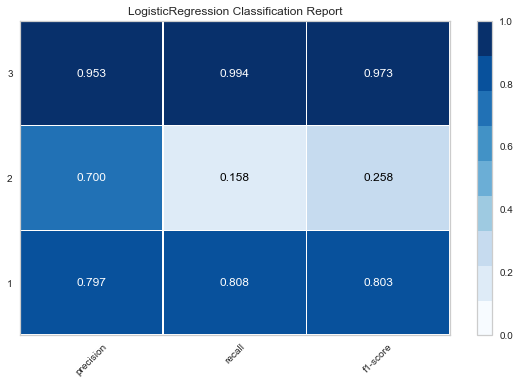

In [10]:
show_report(logreg_C, X_train, y_train, 'classification', 'train')
show_report(logreg_C, X_test, y_test, 'classification', 'test')
#show_report(logreg_C, X_train, y_train, 'confusion', 'train')
#show_report(logreg_C, X_test, y_test, 'confusion', 'test')
classifiers['LogisticRegression C=1000 L2 regularization'] = logreg_C

C of 1000 did a better prediction than default.

But when it comes to prediction of **class 2**, it did not predict well.

**Perform cross validation.**

In [11]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=RANDOM_STATE)

logregmodelCV = LogisticRegression(C=c)
logregmodelCV.fit(X_train, y_train)
scorelogregCV = cross_val_score(logregmodelCV, X_train, y_train, cv=kfold)
testscorelogregCV = cross_val_score(logregmodelCV, X_test, y_test, cv=kfold)

print('10-fold cross validation average accuracy on train set is {:.5f}'.format(scorelogregCV.mean()))
print('10-fold cross validation average accuracy on test set is {:.5f}'.format(testscorelogregCV.mean()))

10-fold cross validation average accuracy on train set is 0.95147
10-fold cross validation average accuracy on test set is 0.94195


Training classification report.


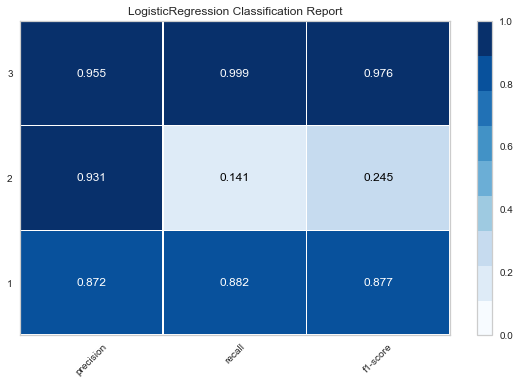

Test classification report.


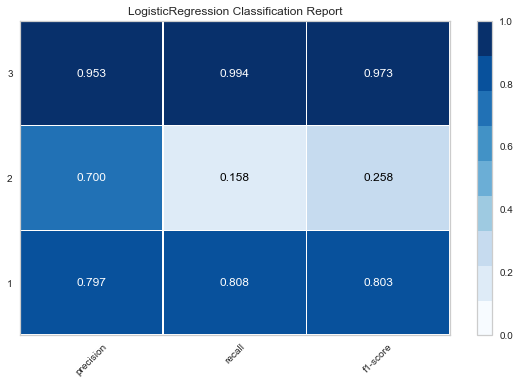

In [12]:
show_report(logregmodelCV, X_train, y_train, 'classification', 'train')
show_report(logregmodelCV, X_test, y_test, 'classification', 'test')
#show_report(logregmodelCV, X_train, y_train, 'confusion', 'train')
#show_report(logregmodelCV, X_test, y_test, 'confusion', 'test')
#classifiers['LogisticRegression C=1000 cross-validation']=logregmodelCV

After cross_validation compared with logreg_C accuracy was a bit lower, will stick with logreg_C.

Applying regularizations for logreg_C.

L2 (default) regularization.
Training classification report.


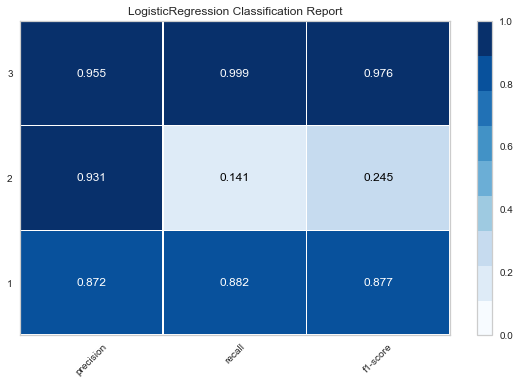

Test classification report.


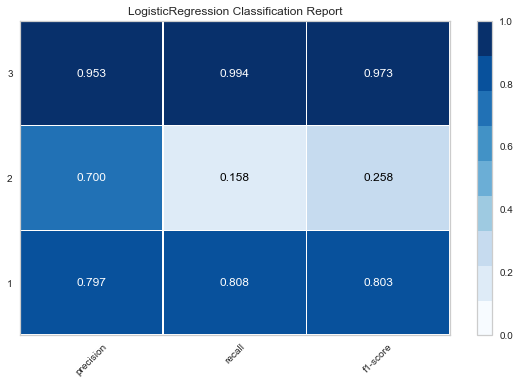

In [13]:
print('L2 (default) regularization.')
show_report(logreg_C, X_train, y_train, 'classification', 'train')
show_report(logreg_C, X_test, y_test, 'classification', 'test')
#show_report(logreg_C, X_train, y_train, 'confusion', 'train')
#show_report(logreg_C, X_test, y_test, 'confusion', 'test')

In [14]:
logreg_C_l1 = LogisticRegression(penalty='l1', C=c)

_ = classifier_scores(logreg_C_l1, 'train', X_train, y_train, True)
_ = classifier_scores(logreg_C_l1, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.957317073171
Accuracy score of classifier on test is 0.949533255543


L1 regularization
Training classification report.


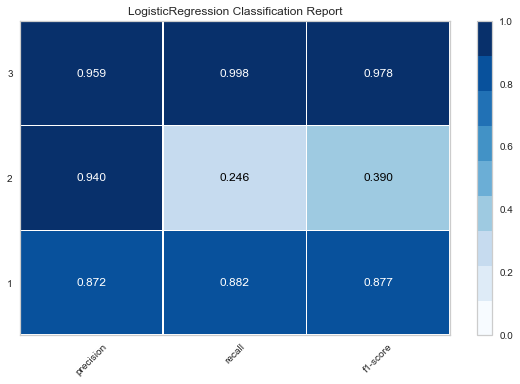

Test classification report.


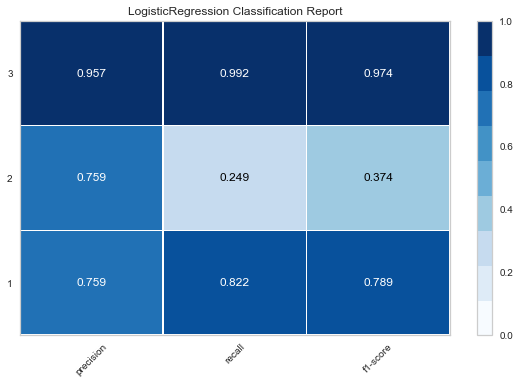

In [15]:
print('L1 regularization')
show_report(logreg_C_l1, X_train, y_train, 'classification', 'train')
show_report(logreg_C_l1, X_test, y_test, 'classification', 'test')
#show_report(logreg_C_l1, X_train, y_train, 'confusion', 'train')
#show_report(logreg_C_l1, X_test, y_test, 'confusion', 'test')
classifiers['LogisticRegression C=1000 L1 regularization'] = logreg_C_l1

With **L2, L1** regularization(s) the model performed bad in predicting **class 2** in both training and testing phases, by looking at the precision, recall, F1 score.

Logistic regression was not a good model here.

## Base model (LogisticRegression) was not a good classifier in predicting classes.
## Plus from the observation we see that we have an imbalanced data set, so will be applying different techniques to get better classification. 

Training classification report.


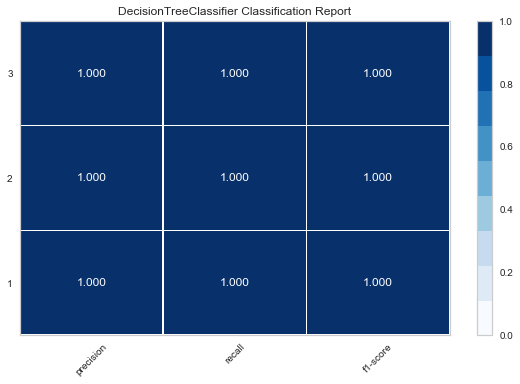

Test classification report.


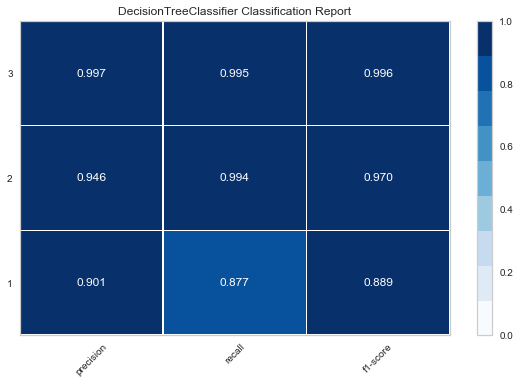

In [16]:
# Perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)

train_score = classifier_scores(dtree_clf, 'train', X_train, y_train)
test_score = classifier_scores(dtree_clf, 'test', X_test, y_test)
show_report(dtree_clf, X_train, y_train, 'classification', 'train')
show_report(dtree_clf, X_test, y_test, 'classification', 'test')
#show_report(dtree_clf, X_train, y_train, 'confusion', 'train')
#show_report(dtree_clf, X_test, y_test, 'confusion', 'test')
classifiers['DecisionTreeClassifier'] = dtree_clf

In [17]:
# Perform RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

randomforest_clf = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(randomforest_clf, 'train', X_train, y_train, True)
_ = classifier_scores(randomforest_clf, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.99008168028


Training classification report.


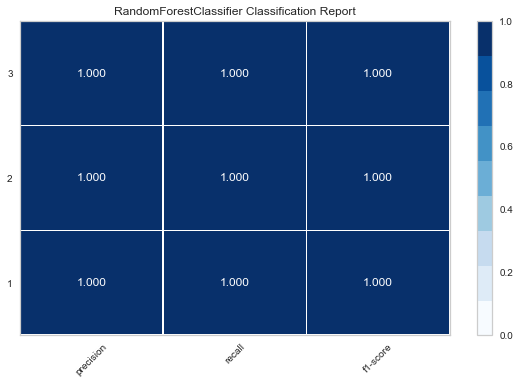

Test classification report.


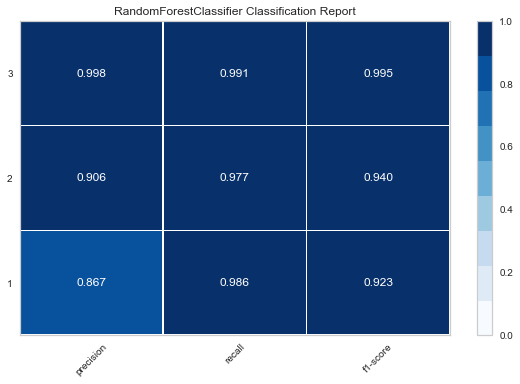

In [18]:
show_report(randomforest_clf, X_train, y_train, 'classification', 'train')
show_report(randomforest_clf, X_test, y_test, 'classification', 'test')
#show_report(rf_clf, X_train, y_train, 'confusion', 'train')
#show_report(rf_clf, X_test, y_test, 'confusion', 'test')
classifiers['RandomForestClassifier'] = randomforest_clf

In [19]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=RANDOM_STATE)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

rf_oversampler = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_oversampler, 'train', os_features, os_labels, True)
_ = classifier_scores(rf_oversampler, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.992998833139


Training classification report.


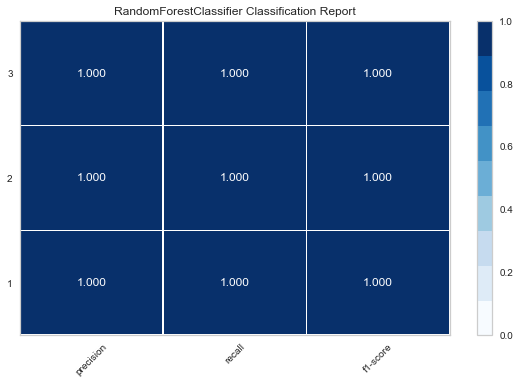

Test classification report.


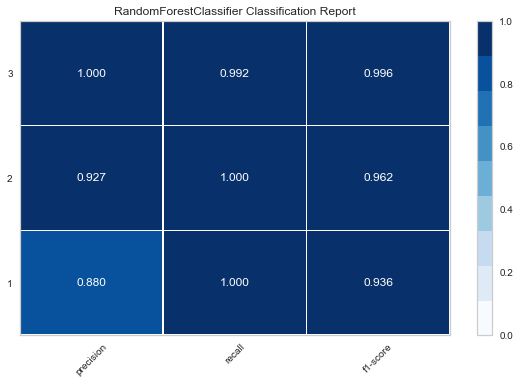

In [20]:
show_report(rf_oversampler, os_features, os_labels, 'classification', 'train')
show_report(rf_oversampler, X_test, y_test, 'classification', 'test')
#show_report(rf_oversampler, os_features, os_labels, 'confusion', 'train')
#show_report(rf_oversampler, X_test, y_test, 'confusion', 'test')
classifiers['RandomForestClassifier using SMOTE (over-sampling)'] = rf_oversampler

Accuracy score of classifier on train is 0.957051961824
Accuracy score of classifier on test is 0.949533255543
Training classification report.


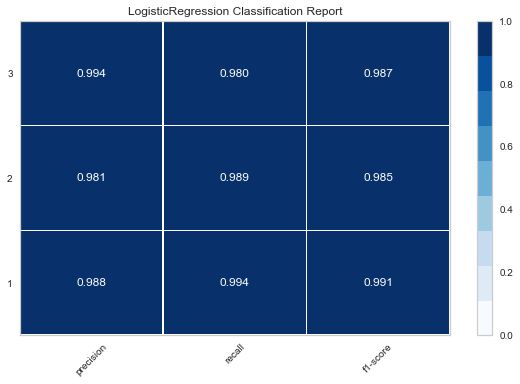

Test classification report.


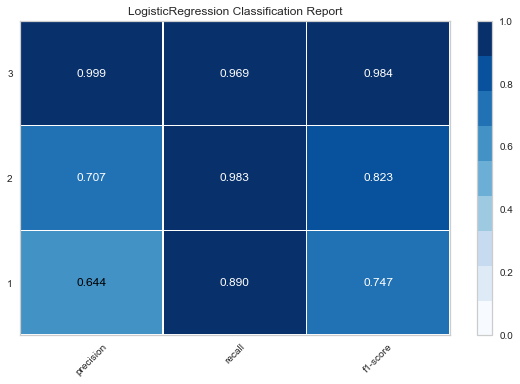

In [21]:
logreg_C_l1_smote = LogisticRegression(penalty='l1', C=c)

_ = classifier_scores(logreg_C_l1_smote, 'train', X_train, y_train, True)
_ = classifier_scores(logreg_C_l1_smote, 'test', X_test, y_test, True)
show_report(logreg_C_l1_smote, os_features, os_labels, 'classification', 'train')
show_report(logreg_C_l1_smote, X_test, y_test, 'classification', 'test')

#show_report(logreg_C_l1, os_features, os_labels, 'confusion', 'train')
#show_report(logreg_C_l1, X_test, y_test, 'confusion', 'test')
classifiers['LogisticRegression C=1000 L1 regularization using SMOTE'] = logreg_C_l1_smote

SMOTE performs over sampling on the minority class, let's perform under sampling on the majority class.

In [22]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler(random_state=RANDOM_STATE)
us_features, us_labels = under_sampler.fit_sample(X_train,y_train)

rf_undersampler = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_undersampler, 'train', us_features, us_labels, True)
_ = classifier_scores(rf_undersampler, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.948949824971


Training classification report.


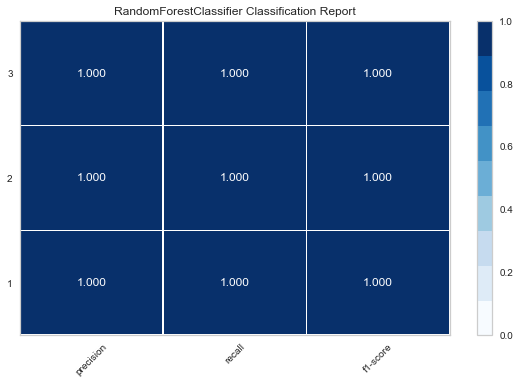

Test classification report.


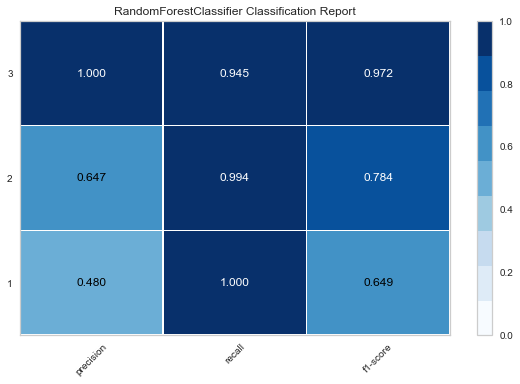

In [23]:
show_report(rf_undersampler, us_features, us_labels, 'classification', 'train')
show_report(rf_undersampler, X_test, y_test, 'classification', 'test')
#show_report(rf_undersampler, us_features, us_labels, 'confusion', 'train')
#show_report(rf_undersampler, X_test, y_test, 'confusion', 'test')
classifiers['RandomForestClassifier using RandomUnderSampler (under-sampling)'] = rf_undersampler

By looking at the confusion matrix, under sampling did not predict **class 3** properly.

Will perform under sampling of majority class, over sampling of minority class together and see how it predicts.

In [24]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=RANDOM_STATE)
sme_features, sme_labels = sme.fit_sample(X_train,y_train)
rf_smoteenn = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_smoteenn, 'train', sme_features, sme_labels, True)
_ = classifier_scores(rf_smoteenn, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.999775960569
Accuracy score of classifier on test is 0.988331388565


Training classification report.


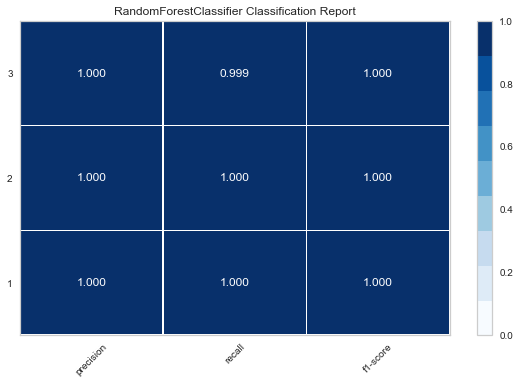

Test classification report.


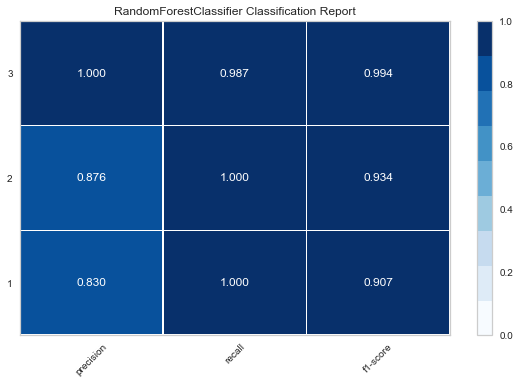

In [25]:
show_report(rf_smoteenn, sme_features, sme_labels, 'classification', 'train')
show_report(rf_smoteenn, X_test, y_test, 'classification', 'test')
#show_report(rf_smoteenn, sme_features, sme_labels, 'confusion', 'train')
#show_report(rf_smoteenn, X_test, y_test, 'confusion', 'test')
classifiers['RandomForestClassifier using SMOTEENN'] = rf_smoteenn

SMOTEENN did a good prediction but a little less in class 3.

But we see **RandomForestClassifier** with **SMOTE** did a good prediction on the test.

### Tunning hyperparameters for RandomForestClassifier.

In [26]:
%%time
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict

ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto/sqrt'",
        RandomForestClassifier( max_features='auto', oob_score=True, random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier( max_features='log2', oob_score=True, random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier( max_features=None,   oob_score=True, random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(os_features, os_labels)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

Wall time: 14min 10s


### Plot OOB errors.

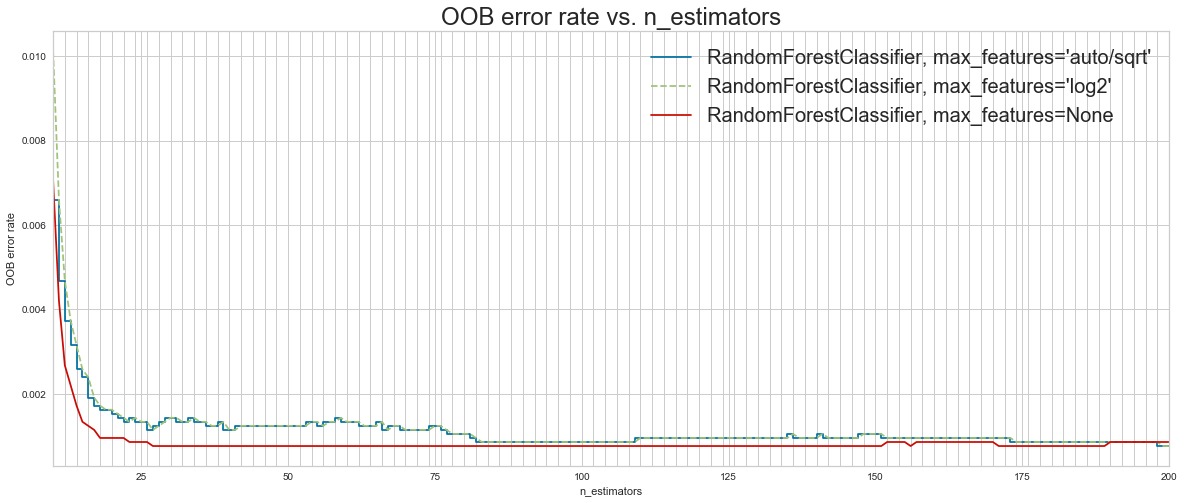

In [27]:
from matplotlib.ticker import MultipleLocator

marker = ['steps','--','-']
i=0

# Generate the "OOB error rate" vs. "n_estimators" plot.
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)

spacing = 2.0
minorLocator = MultipleLocator(spacing)
ax.yaxis.set_minor_locator(minorLocator)
ax.xaxis.set_minor_locator(minorLocator)
ax.grid(which = 'minor')

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, linestyle=marker[i], label=label)
    i+=1

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right", fontsize=20)
plt.title("OOB error rate vs. n_estimators", fontsize=24)
plt.show()

From the observation with max_features=**None** the error rate remains constant around n_estimators = 27, and error rate keeps on decreasing for other max_features and remains constant around n_estimators = 80, 173.

Tuning hyperparameters on the classifier (from SMOTE).

In [28]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(10, 200, num = 200)]

max_features = ['auto', 'sqrt', 'log2', None]

max_depth = [int(x) for x in np.linspace(10, 100, num = 100)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

warm_start= [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'warm_start': warm_start}
#print(random_grid)

# Use the random grid to search for best hyperparameters
random_search_cv_ = RandomizedSearchCV(estimator = rf_oversampler,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 5,
                               verbose=10,
                               random_state=RANDOM_STATE,
                               n_jobs = -1)

Training classification report.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.3s finished


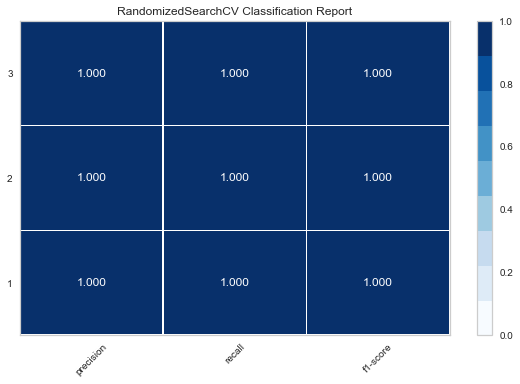

Test classification report.


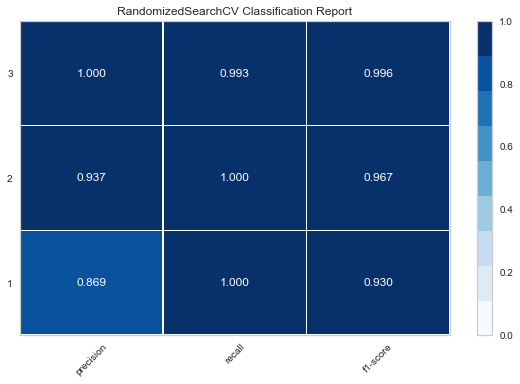

{'warm_start': False, 'n_estimators': 173, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 24, 'bootstrap': False}


In [29]:
show_report(random_search_cv_, os_features, os_labels, 'classification', 'train')
show_report(random_search_cv_, X_test, y_test, 'classification', 'test')
print(random_search_cv_.best_params_)
classifiers['RandomForestClassifier after tuning hyperparameters using SMOTE'] = random_search_cv_

#### From tuning the hyperparameters on the Random forest classifer

In [30]:
random_search_cv_.best_params_

{'bootstrap': False,
 'max_depth': 24,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 173,
 'warm_start': False}

This model performs optimal.

Using SMOTE with RandomizedSearchCV performed better amongst the classifiers.

## Let's generate a classification report comparing how models predicted classes using metrics.

In [31]:
def show_class_report(class_):
    print('-'*103)
    print('\t\t\t\tCLASS',class_,'CLASSIFICATION REPORT ON TEST-SET DATA')
    print('-'*103)
    print('CLASSIFIER\t\t\t\t\t\t\tPRECISION\tRECALL\t\tF-SCORE')
    i = class_ - 1
    for classifier_name, classifier in sorted(classifiers.items()):
        print('-'*103)
        precision,recall,fscore,support=score(y_test,classifier.predict(X_test),average=None)
        print(classifier_name)
        print ('\t\t\t\t\t\t\t\t{:.3%}'.format(precision[i]),'\t{:.3%}'.format(recall[i]),'\t{:.3%}'.format(fscore[i]))

In [32]:
show_class_report(1)

-------------------------------------------------------------------------------------------------------
				CLASS 1 CLASSIFICATION REPORT ON TEST-SET DATA
-------------------------------------------------------------------------------------------------------
CLASSIFIER							PRECISION	RECALL		F-SCORE
-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier
								90.141% 	87.671% 	88.889%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization
								75.949% 	82.192% 	78.947%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization using SMOTE
								64.356% 	89.041% 	74.713%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L2 regularization
								79.73

In [33]:
show_class_report(2)

-------------------------------------------------------------------------------------------------------
				CLASS 2 CLASSIFICATION REPORT ON TEST-SET DATA
-------------------------------------------------------------------------------------------------------
CLASSIFIER							PRECISION	RECALL		F-SCORE
-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier
								94.624% 	99.435% 	96.970%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization
								75.862% 	24.859% 	37.447%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization using SMOTE
								70.732% 	98.305% 	82.270%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L2 regularization
								70.00

In [34]:
show_class_report(3)

-------------------------------------------------------------------------------------------------------
				CLASS 3 CLASSIFICATION REPORT ON TEST-SET DATA
-------------------------------------------------------------------------------------------------------
CLASSIFIER							PRECISION	RECALL		F-SCORE
-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier
								99.685% 	99.465% 	99.575%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization
								95.746% 	99.150% 	97.418%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization using SMOTE
								99.903% 	96.853% 	98.354%
-------------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L2 regularization
								95.29

From the above metrics we see RandomForestClassifier using SMOTE (with default params) can be considered as a better model for classifying.

## Over-fitting model (analysis)

In [35]:
def show_over_fitting_model(classifier):
    print('-'*100)
    print(classifier)
    print('-'*100)
    print('CLASS\t\t\t PRECISION\t\tRECALL\t\t\tF-SCORE')
    print('-'*100)
    print('\t\t\t TRAINING|TEST\t\tTRAINING|TEST\t\tTRAINING|TEST')
    print('-'*100)
    clf = classifiers[classifier]
    precision1,recall1,fscore1,support2=score(y_train,clf.predict(X_train),average=None)
    precision2,recall2,fscore2,support2=score(y_test,clf.predict(X_test),average=None)
    for i in range(0,3):
        print ('CLASS',i+1,'\t\t',
               '{:.3%}'.format(precision1[i]),'|{:.3%}'.format(precision2[i]),
               '\t{:.3%}'.format(recall1[i]),'|{:.3%}'.format(recall2[i]),
               '\t{:.3%}'.format(fscore1[i]),'|{:.3%}'.format(fscore2[i]))

In [36]:
show_over_fitting_model('LogisticRegression C=1000 L1 regularization')
show_over_fitting_model('LogisticRegression C=1000 L1 regularization using SMOTE')

----------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization
----------------------------------------------------------------------------------------------------
CLASS			 PRECISION		RECALL			F-SCORE
----------------------------------------------------------------------------------------------------
			 TRAINING|TEST		TRAINING|TEST		TRAINING|TEST
----------------------------------------------------------------------------------------------------
CLASS 1 		 87.234% |75.949% 	88.172% |82.192% 	87.701% |78.947%
CLASS 2 		 94.000% |75.862% 	24.607% |24.859% 	39.004% |37.447%
CLASS 3 		 95.948% |95.746% 	99.799% |99.150% 	97.836% |97.418%
----------------------------------------------------------------------------------------------------
LogisticRegression C=1000 L1 regularization using SMOTE
----------------------------------------------------------------------------------------------------
CLASS			 PRECISIO

Initially LogisticRegression was picked up as a base model with L1 regularization.

After tuning the hyper parameter, trained the models with training data and synthetic training data (using SMOTE).

After fitting the models, it is tested on test data. And we see after testing the model it did not perform as expected.

This is because of over-fitting the data during training phase.

From the above report we see how it performed during training and testing.

For Class 1, 2 it's precision difference is noticable w.r.t test data, training precision was high but after testing it was low (clearly it over-fitted the data).

## From the datasets (both training and testing) we encountered highly imbalanced datasets, so we did oversampling on the minoirty classes using SMOTE which improved the classification performance for the training phase.
## Using RandomizedSearchCV further tuning of the hyperparameters were done and an optimal model for classifying was found. But RandomForestClassifier with default params also performed the same (using SMOTE) during training.
## After testing phase the model (RandomForestClassifier, with tuned hyperparams) performed well among the models.

# Feature importance analysis.
### LogisticRegression

In [37]:
clf = classifiers['LogisticRegression C=1000 L1 regularization using SMOTE']
# Using standarized parameters
_ = clf.fit(X_train / np.std(X_train, 0), y_train)

In [38]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = X_train.columns.values.tolist()
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("(%s * %s)" % (np.round(coef, 3), name) for coef, name in lst)

In [39]:
for i in range(0,3):
    print('-'*105)
    print('Class',i+1,':\n',pretty_print_linear(clf.coef_[i]))

---------------------------------------------------------------------------------------------------------
Class 1 :
 (0.122 * age) + (-0.96 * sex) + (-0.088 * on thyroxine) + (-0.805 * query on thyroxine) + (-0.722 * on antithyroid medication) + (-1.487 * sick) + (-0.926 * pregnant) + (-0.553 * thyroid surgery) + (0.163 * I131 treatment) + (0.192 * query hypothyroid) + (-0.907 * query hyperthyroid) + (-0.47 * lithium) + (-0.796 * goitre) + (0.24 * tumor) + (-0.021 * hypopituitary) + (-1.939 * psych) + (0.718 * TSH measured) + (-0.849 * T3 measured) + (3.963 * TT4 measured) + (-1.318 * T4U measured) + (-9.07 * FTI measured)
---------------------------------------------------------------------------------------------------------
Class 2 :
 (0.0 * age) + (-0.245 * sex) + (-3.741 * on thyroxine) + (0.064 * query on thyroxine) + (-0.065 * on antithyroid medication) + (0.046 * sick) + (-1.187 * pregnant) + (-1.24 * thyroid surgery) + (0.022 * I131 treatment) + (0.248 * query hypothyroid) + (

In [40]:
print('Decreasing order of feature importances for each class.')
for i in range(0,3):
    print('-'*105)
    print('Class',i+1,':\n',X_train.columns[np.argsort(clf.coef_[i])][::-1])

Decreasing order of feature importances for each class.
---------------------------------------------------------------------------------------------------------
Class 1 :
 Index(['TT4 measured', 'TSH measured', 'tumor', 'query hypothyroid',
       'I131 treatment', 'age', 'hypopituitary', 'on thyroxine', 'lithium',
       'thyroid surgery', 'on antithyroid medication', 'goitre',
       'query on thyroxine', 'T3 measured', 'query hyperthyroid', 'pregnant',
       'sex', 'T4U measured', 'sick', 'psych', 'FTI measured'],
      dtype='object')
---------------------------------------------------------------------------------------------------------
Class 2 :
 Index(['TT4 measured', 'query hypothyroid', 'tumor', 'query on thyroxine',
       'query hyperthyroid', 'sick', 'TSH measured', 'I131 treatment', 'age',
       'lithium', 'psych', 'on antithyroid medication', 'hypopituitary',
       'T4U measured', 'sex', 'T3 measured', 'goitre', 'FTI measured',
       'pregnant', 'thyroid surgery', '

In [41]:
features_ = []
for i in range(0,3):
    features_.append(dict(zip(np.argsort(clf.coef_[i])[::-1], np.sort(clf.coef_[i])[::-1])))
#features_

In [42]:
sorted_features_ = []
for i in range(0,3):
    sorted_features_.append(dict((X_train.columns.values[key], value) for key, value in features_[i].items() if value >= 0.001))

In [43]:
data_frames_ = []
for i in range(0,3):
    df_ = pd.DataFrame(list(sorted_features_[i].items()), columns=['Feature','Feature contribution'])
    data_frames_.append(df_)

### Plot a bar graph to show the positive feature contributors for each class.

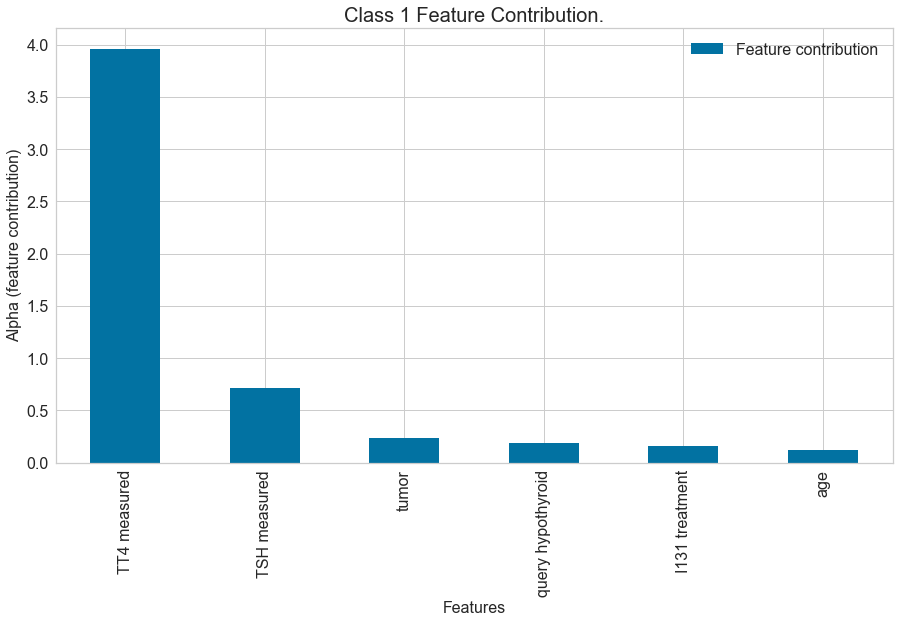

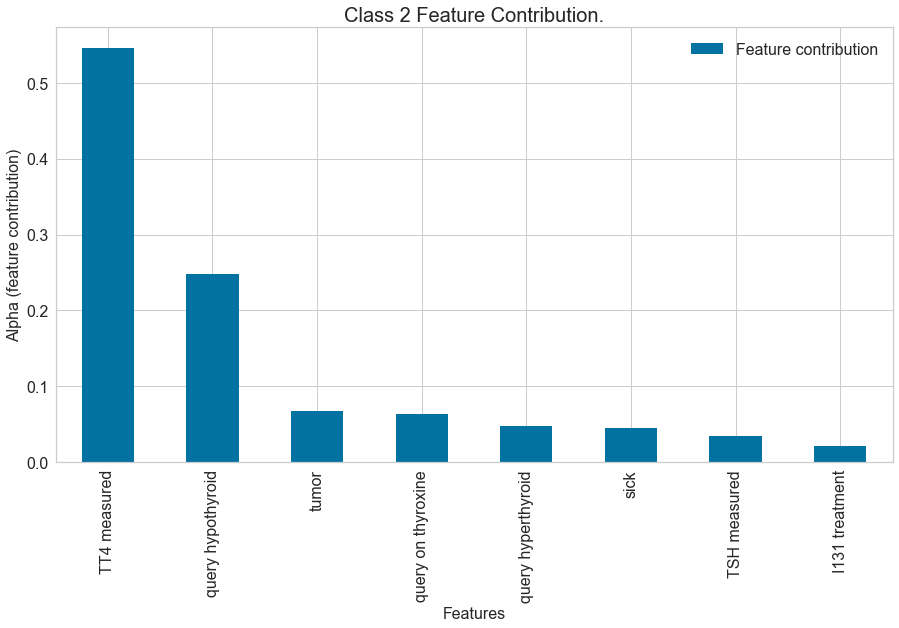

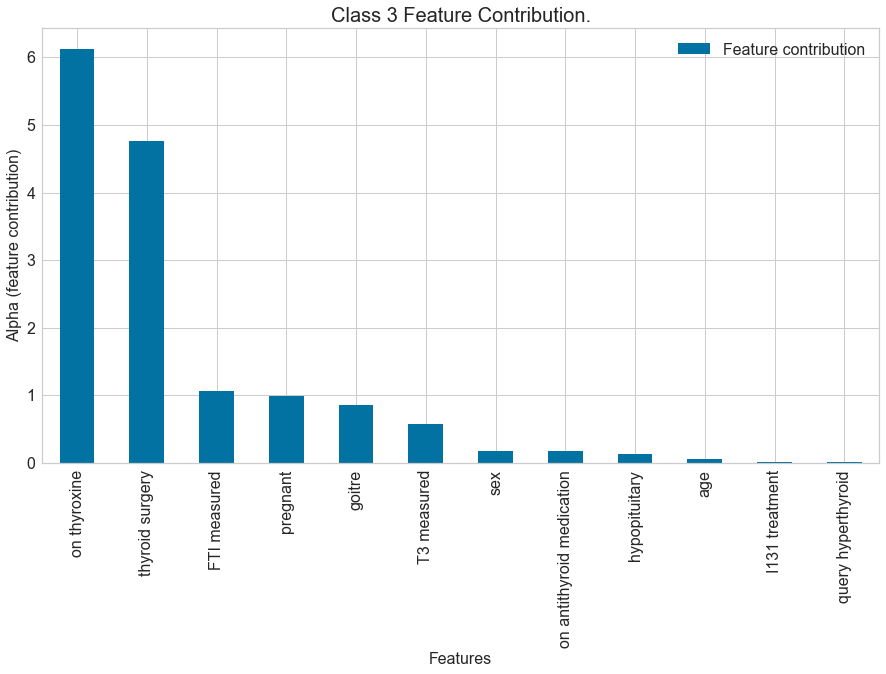

In [44]:
for i in range(0,3):
    data_frames_[i].plot(kind='bar',x='Feature', figsize=(15, 8), fontsize=16)
    plt.ylabel('Alpha (feature contribution)', fontsize=16)
    plt.xlabel('Features',fontsize=16)
    plt.legend(fontsize=16)
    plt.title('Class %s Feature Contribution.'%(i+1),fontsize=20)
plt.show()

## From the above features LogisticRegression shows how it picked up features for each class, it shows its important features to clasify particular class.
### RandomForestClassifier

In [45]:
clf = classifiers['RandomForestClassifier using SMOTE (over-sampling)']
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [46]:
feature_imp_dict = {}
for f in range(X_train.shape[1]):
    feature_imp_dict[X_train.columns.get_values()[indices[f]]]= importances[indices[f]]*100

In [47]:
feature_imp_df = pd.DataFrame(list(feature_imp_dict.items()), columns=['Feature','Feature contribution'])
print(feature_imp_df)

                      Feature  Feature contribution
0                TSH measured             44.673037
1                FTI measured             33.145522
2                 T3 measured             12.978982
3                TT4 measured              2.211325
4                         sex              1.745994
5                on thyroxine              1.423329
6                         age              1.049395
7                T4U measured              0.925928
8                        sick              0.579059
9                       psych              0.412036
10          query hypothyroid              0.250092
11            thyroid surgery              0.229556
12         query on thyroxine              0.116939
13         query hyperthyroid              0.087892
14                      tumor              0.083333
15             I131 treatment              0.037277
16                     goitre              0.019894
17  on antithyroid medication              0.010687
18          

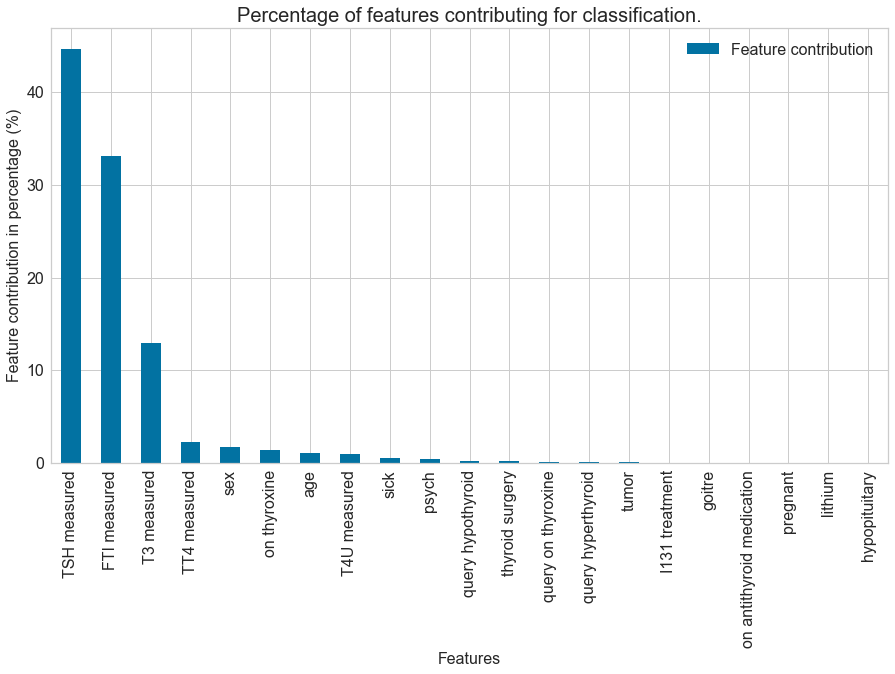

In [48]:
feature_imp_df.plot(kind='bar',x='Feature', figsize=(15, 8), fontsize=16)
plt.ylabel('Feature contribution in percentage (%)', fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.legend(fontsize=16)
plt.title('Percentage of features contributing for classification.',fontsize=20)
plt.show()

## The above bar diagram shows RandomForestClassifier feature selection/importance when trying to classify.